In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import plot_confusion_matrix, f1_score

In [2]:
train = pd.read_csv("data/train_age_dataset.csv")
test = pd.read_csv("data/test_age_dataset.csv")

In [3]:
CLASS_NAMES = list(train["age_group"].unique())

In [4]:
X = train.drop(["Unnamed: 0", "userId", "age_group"], axis=1)
y = train["age_group"]

In [5]:
def split(X, y, test_size=0.2):
    X = X.to_numpy()
    y = y.to_numpy()
    sss = StratifiedShuffleSplit(test_size=0.5, random_state=0)
    for train_index, test_index in sss.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
    return (X_train, y_train, X_test, y_test)

In [6]:
X_train, y_train, X_val, y_val = split(X, y)

In [7]:
# Training a baseline Logistic regressor
logistic_clf = LogisticRegression(random_state=0).fit(X_train, y_train)

/home/rishabh/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [8]:
y_train_hat = logistic_clf.predict(X_train)
y_val_hat = logistic_clf.predict(X_val)

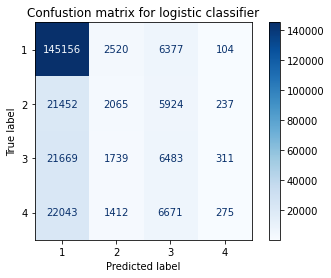

In [9]:
disp = plot_confusion_matrix(logistic_clf, X_train, y_train, 
                             display_labels=CLASS_NAMES, cmap=plt.cm.Blues)
disp.ax_.set_title("Confustion matrix for logistic classifier");

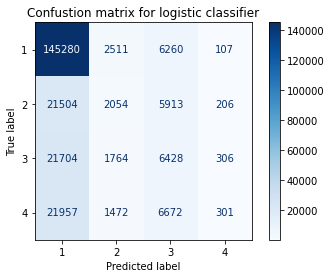

In [10]:
disp = plot_confusion_matrix(logistic_clf, X_val, y_val, 
                             display_labels=CLASS_NAMES, cmap=plt.cm.Blues)
disp.ax_.set_title("Confustion matrix for logistic classifier");

In [11]:
unique, counts = np.unique(y_val, return_counts=True)
dict(zip(unique, counts))

{1: 154158, 2: 29677, 3: 30202, 4: 30402}

In [12]:
unique, counts = np.unique(y_train, return_counts=True)
dict(zip(unique, counts))

{1: 154157, 2: 29678, 3: 30202, 4: 30401}

In [13]:
score_train = f1_score(y_train, y_train_hat, average="weighted")

In [14]:
score_train

0.5467003082078473

In [23]:
test.drop(["Unnamed: 0", "userId"], axis=1, inplace = True)

In [24]:
test_pred = logistic_clf.predict(test)

In [26]:
test_pred = pd.Series(test_pred, name="prediction")
test_pred.to_csv("baseline.csv", index=False)